# Using clusters

what is it?
- now that we have made our clusters, how do we use them?

what do we care? 
- to get some usefulness out of our unsupervised learning

## Clusters are about providing options and insight

- Step 1: Explore the clusters
- Step 2: Name the clusters
- Step 3: 
    - Option 1: Dimensionality reduction
    - Option 2: Treat cluster names as a new target variable
    - Option 3: Perform deeper EDA
    - Option 4: Make many models

# Show us!

Scenario: Analyzing our mall data and seeing how unsupervised learning can drive our data insights

In [1]:
#do the data things
import pandas as pd
import numpy as np

#visualize & stastisize
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#prepore and model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#my creds
from env import get_db_url

## Acquire

In [2]:
#get my data
df = pd.read_sql('SELECT * FROM customers;', get_db_url('mall_customers'))
df = df.set_index('customer_id')

#see it
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## Prepare

Since my dataset was so small, I made my validate and test dataframes smaller than normal
- this is probably too small to be utilized in the real world
- the tiny validate and test are just to show the steps of working through a split df

In [5]:
def train_validate_test_split(df, seed=123):
    '''
    accepts dataframe and splits the data into train, validate and test 
    '''
    train_validate, test = train_test_split(df, test_size=0.05, random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.05, random_state=seed)
    return train, validate, test

In [6]:
def scale_my_data(train, validate, test, features):
    '''
    scale my data using minmaxscaler, input the features to scale
    '''
    scaler = MinMaxScaler()
    scaler.fit(train[features])
    
    train_scaled = scaler.transform(train[features])
    validate_scaled = scaler.transform(validate[features])
    test_scaled = scaler.transform(test[features])

    train_scaled = pd.DataFrame(train_scaled, index=train.index, columns=features)
    validate_scaled = pd.DataFrame(validate_scaled, index=validate.index, columns=features)
    test_scaled = pd.DataFrame(test_scaled, index=test.index, columns=features)
    
    return train_scaled, validate_scaled, test_scaled

In [7]:
def prep_mall(df):
    '''
    dummy var for gender into is_male
    split on target of 'spending_score'
    scale age and annual income. 
    '''
    df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
    train, validate, test = train_validate_test_split(df)
    
    print(f'df: {df.shape}')
    print()
    print(f'train: {train.shape}')
    print(f'validate: {validate.shape}')
    print(f'test: {test.shape}')
    return train, validate, test

In [8]:
#prep my data!
train, validate, test = prep_mall(df)

df: (200, 5)

train: (180, 5)
validate: (10, 5)
test: (10, 5)


In [9]:
train.head()

,gender,age,annual_income,spending_score,is_male
customer_id,,,,,
53,Female,31,43,54,0
98,Female,27,60,50,0
198,Male,32,126,74,1
43,Male,48,39,36,1
160,Female,30,78,73,0


In [10]:
features_to_scale = ['age','annual_income','spending_score']

In [11]:
train_scaled, validate_scaled, test_scaled = scale_my_data(train, validate, test, features_to_scale)
train_scaled

,age,annual_income,spending_score
customer_id,,,
53,0.250000,0.229508,0.540816
98,0.173077,0.368852,0.500000
198,0.269231,0.909836,0.744898
43,0.576923,0.196721,0.357143
160,0.230769,0.516393,0.734694
...,...,...,...
27,0.519231,0.106557,0.316327
164,0.250000,0.540984,0.938776
193,0.288462,0.803279,0.071429


## Explore

We explored all the things!
- hypothesize
- visualize
- statisticize
- summarize

We found that age, annual_income, and spending score looked like were good canidates for clusters. 

We utilized the elbow method to determine the best number of clusters

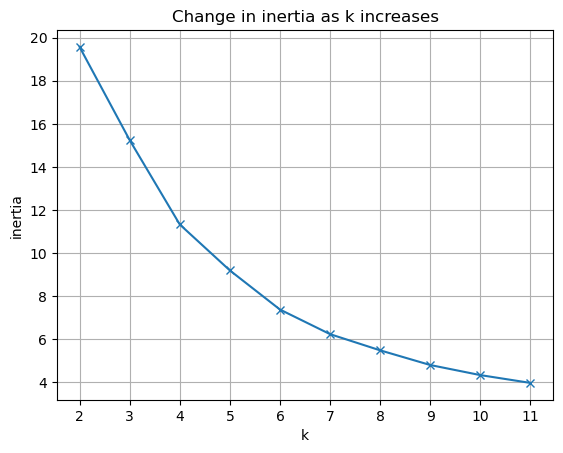

In [12]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=42, n_init=10)\
     .fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

#### Move forward optimal cluster number (i choose 4)

In [13]:
#make it
kmeans = KMeans(n_clusters = 4, random_state=42, n_init=10)

#fit it
kmeans.fit(train_scaled)

#use it
kmeans.predict(train_scaled)

array([2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 3, 2, 3, 1, 3, 1, 2, 3, 2,
       0, 3, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0, 3, 1, 2, 0, 2, 0, 0, 3, 2, 0,
       3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 3,
       0, 1, 1, 0, 1, 3, 1, 1, 1, 2, 3, 0, 1, 2, 2, 2, 3, 0, 1, 3, 2, 3,
       0, 0, 2, 2, 2, 3, 2, 2, 1, 2, 3, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2,
       2, 0, 1, 0, 1, 3, 3, 2, 3, 0, 2, 2, 2, 1, 3, 2, 1, 1, 2, 1, 0, 3,
       1, 2, 3, 1, 1, 2, 2, 2, 1, 3, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0,
       3, 0, 1, 3, 1, 2, 2, 1, 1, 2, 3, 2, 2, 0, 3, 1, 3, 1, 1, 0, 1, 1,
       0, 3, 1, 0], dtype=int32)

#### Now save all of the newly created clusters

In [14]:
# And assign the cluster number to a column on the dataframe
train_scaled["cluster"] = kmeans.predict(train_scaled)
train_scaled.head()

,age,annual_income,spending_score,cluster
customer_id,,,,
53,0.250000,0.229508,0.540816,2
98,0.173077,0.368852,0.500000,2
198,0.269231,0.909836,0.744898,0
43,0.576923,0.196721,0.357143,1
160,0.230769,0.516393,0.734694,0


## Yay clusters! What next?

- Step 1: Explore the clusters
- Step 2: Name the clusters
- Step 3: 
    - Option 1: Dimensionality reduction
    - Option 2: Treat cluster names as a new target variable
    - Option 3: Perform deeper EDA
    - Option 4: Make many models

### Step 1: Explore the clusters

see how they are similiar or different

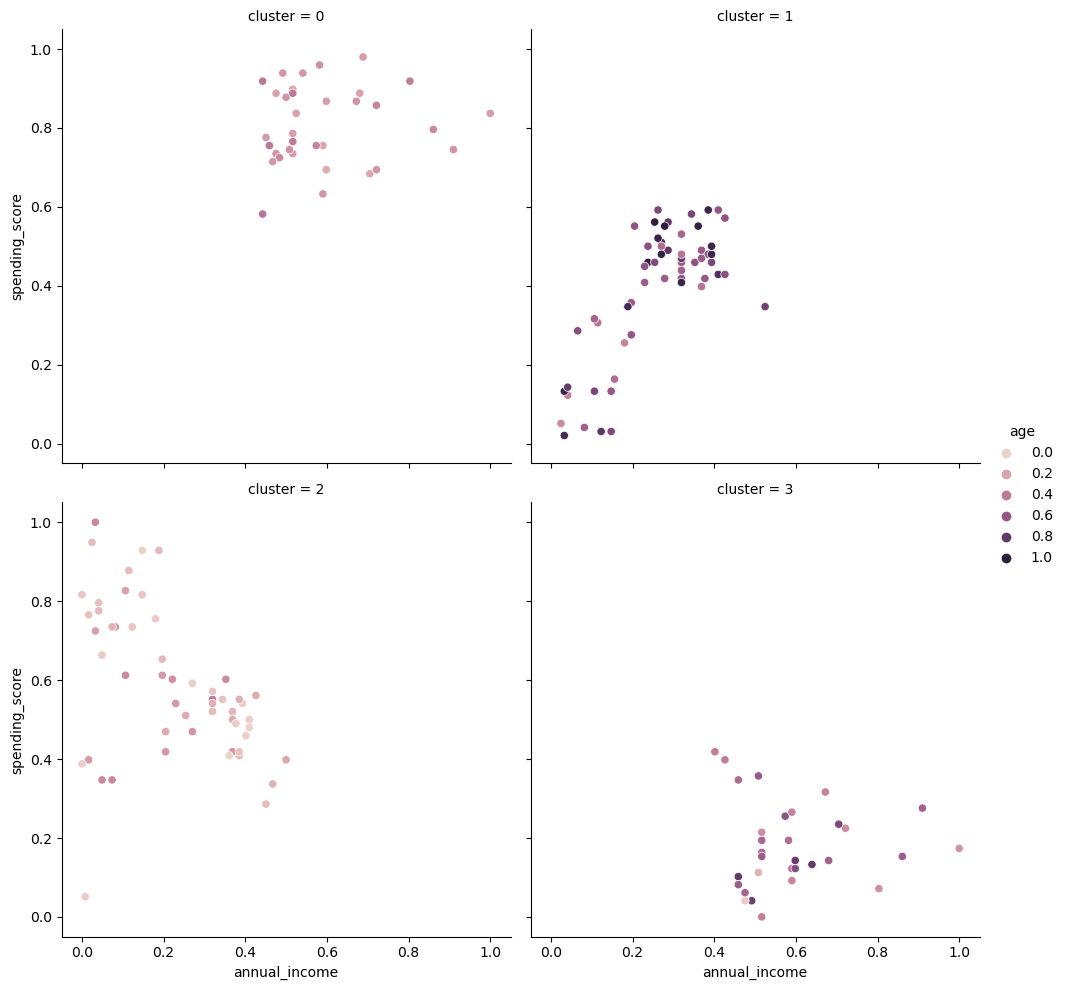

In [19]:
# plot out income vs. spending with regard to the cluster and age
sns.relplot(data=train_scaled,
           x='annual_income',
           y='spending_score',
           hue='age',
           col='cluster',
           col_wrap=2)
plt.show()

### Step 2: Name the clusters 

use natural, descriptive language

In [21]:
#rename using map
train['cluster'] = train_scaled.cluster.map({
    0:'young_ballers',
    1:'old_poor_and_low_spending',
    2:'young_spending_above_their_means',
    3:'old_frugal'
})

In [22]:
train.head()

,gender,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,,
53,Female,31,43,54,0,young_spending_above_their_means
98,Female,27,60,50,0,young_spending_above_their_means
198,Male,32,126,74,1,young_ballers
43,Male,48,39,36,1,old_poor_and_low_spending
160,Female,30,78,73,0,young_ballers


### Step 3: Options

#### Let's say our mall dataset had more features in it, this will allow us to better utilize our clusters

In [23]:
train['transportation'] = np.random.choice(['personal_vehicle','walking','dropoff'],len(train),p=[.75,0.05,.2])
train['group_size'] = np.random.randint(1,10,len(train))
train['hair_color'] = np.random.choice(['black','brown','blonde','grey','other'],len(train))

In [24]:
train.head()

,gender,age,annual_income,spending_score,is_male,cluster,transportation,group_size,hair_color
customer_id,,,,,,,,,
53,Female,31,43,54,0,young_spending_above_their_means,personal_vehicle,6,grey
98,Female,27,60,50,0,young_spending_above_their_means,personal_vehicle,5,other
198,Male,32,126,74,1,young_ballers,dropoff,5,blonde
43,Male,48,39,36,1,old_poor_and_low_spending,personal_vehicle,8,black
160,Female,30,78,73,0,young_ballers,dropoff,8,other


### Option 1: Use the clusters to simplify multiple other variables
- Since the cluster names make sense, we can use them instead of age, spending, and income
    - this potentially makes our features simplier and easier to explain
        - helpful for storytelling
    - this allows us to reduce features
        - likely help model performance (regression, classification)

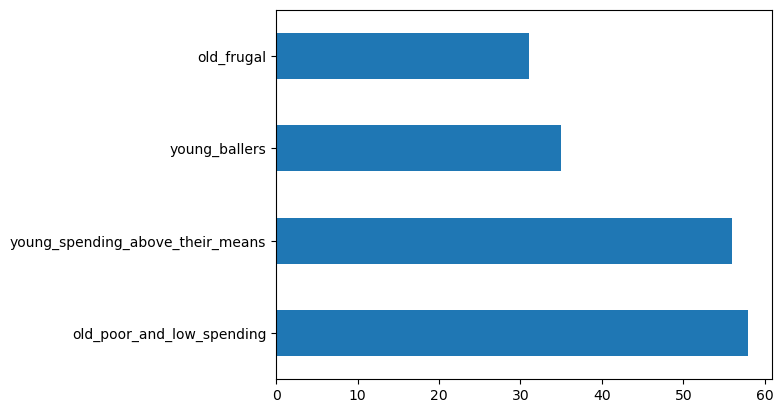

In [37]:
train.cluster.value_counts().plot.barh();

#### lets say we wanted to predict transportation

In [25]:
train.head()

,gender,age,annual_income,spending_score,is_male,cluster,transportation,group_size,hair_color
customer_id,,,,,,,,,
53,Female,31,43,54,0,young_spending_above_their_means,personal_vehicle,6,grey
98,Female,27,60,50,0,young_spending_above_their_means,personal_vehicle,5,other
198,Male,32,126,74,1,young_ballers,dropoff,5,blonde
43,Male,48,39,36,1,old_poor_and_low_spending,personal_vehicle,8,black
160,Female,30,78,73,0,young_ballers,dropoff,8,other


we will now build a classification model since we have a target

In [29]:
#define y_train
y_train = train.transportation
y_train.head()

customer_id
53     personal_vehicle
98     personal_vehicle
198             dropoff
43     personal_vehicle
160             dropoff
Name: transportation, dtype: object

without our clusters

In [30]:
#define X_train
X_train = train[['gender','age','annual_income','spending_score','group_size','hair_color']]
X_train.head()

,gender,age,annual_income,spending_score,group_size,hair_color
customer_id,,,,,,
53,Female,31,43,54,6,grey
98,Female,27,60,50,5,other
198,Male,32,126,74,5,blonde
43,Male,48,39,36,8,black
160,Female,30,78,73,8,other


with our clusters

In [32]:
#define X_train
X_train = train[['gender','cluster','group_size','hair_color']]
X_train.head()

,gender,cluster,group_size,hair_color
customer_id,,,,
53,Female,young_spending_above_their_means,6,grey
98,Female,young_spending_above_their_means,5,other
198,Male,young_ballers,5,blonde
43,Male,old_poor_and_low_spending,8,black
160,Female,young_ballers,8,other


### Option 2: Use cluster names as a target variable to classify new data

In [38]:
train.head()

,gender,age,annual_income,spending_score,is_male,cluster,transportation,group_size,hair_color
customer_id,,,,,,,,,
53,Female,31,43,54,0,young_spending_above_their_means,personal_vehicle,6,grey
98,Female,27,60,50,0,young_spending_above_their_means,personal_vehicle,5,other
198,Male,32,126,74,1,young_ballers,dropoff,5,blonde
43,Male,48,39,36,1,old_poor_and_low_spending,personal_vehicle,8,black
160,Female,30,78,73,0,young_ballers,dropoff,8,other


#### our new clusters can be our target variable

we can once again build a classification model using our new target variable

In [40]:
#define y_train
y_train = train.cluster
y_train.head()

customer_id
53     young_spending_above_their_means
98     young_spending_above_their_means
198                       young_ballers
43            old_poor_and_low_spending
160                       young_ballers
Name: cluster, dtype: object

#### our X_train can NOT include features that were used to calculate our target variable

In [43]:
#define X_train
X_train = train[['gender','transportation','group_size','hair_color']]
X_train.head()

,gender,transportation,group_size,hair_color
customer_id,,,,
53,Female,personal_vehicle,6,grey
98,Female,personal_vehicle,5,other
198,Male,dropoff,5,blonde
43,Male,personal_vehicle,8,black
160,Female,dropoff,8,other


### Option 3: Perform deeper EDA
Sometimes the identification of clusters gives us additional questions we need to ask.
- hypothesize
- visualize
- statisticize
- summarize

In [44]:
train.head()

,gender,age,annual_income,spending_score,is_male,cluster,transportation,group_size,hair_color
customer_id,,,,,,,,,
53,Female,31,43,54,0,young_spending_above_their_means,personal_vehicle,6,grey
98,Female,27,60,50,0,young_spending_above_their_means,personal_vehicle,5,other
198,Male,32,126,74,1,young_ballers,dropoff,5,blonde
43,Male,48,39,36,1,old_poor_and_low_spending,personal_vehicle,8,black
160,Female,30,78,73,0,young_ballers,dropoff,8,other


#### How do the clusters (customer groups) compare to the group size?

(array([0, 1, 2, 3]),
 [Text(0, 0, 'young_spending_above_their_means'),
  Text(1, 0, 'young_ballers'),
  Text(2, 0, 'old_poor_and_low_spending'),
  Text(3, 0, 'old_frugal')])

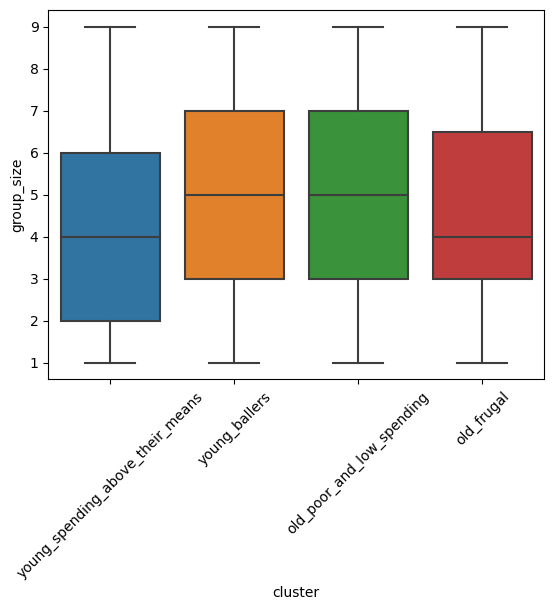

In [47]:
sns.boxplot(data=train, x='cluster',y='group_size')
plt.xticks(rotation=45)

verify with a stats test!

write our conclusion!

### Option 4: Create a Many Models Approach

For each unique value in our cluster, build a separate model. Therefore, each cluser can have it's own model

In [49]:
train.cluster.value_counts()

old_poor_and_low_spending           58
young_spending_above_their_means    56
young_ballers                       35
old_frugal                          31
Name: cluster, dtype: int64

#### Model 1 -  Young people who are low income and spend a lot

In [53]:
to_drop = ['age','annual_income','spending_score', 'cluster']

In [56]:
train [train.cluster == 'young_spending_above_their_means'].drop(columns=to_drop).head()

,gender,is_male,transportation,group_size,hair_color
customer_id,,,,,
53,Female,0,personal_vehicle,6,grey
98,Female,0,personal_vehicle,5,other
88,Female,0,personal_vehicle,4,black
100,Male,1,personal_vehicle,1,grey
40,Female,0,personal_vehicle,1,blonde


In [ ]:
y_train1 = train.transportation

#### Model 2 - Old people who are low income and spend low amounts

In [57]:
train [train.cluster == 'old_poor_and_low_spending'].drop(columns=to_drop).head()

,gender,is_male,transportation,group_size,hair_color
customer_id,,,,,
43,Male,1,personal_vehicle,8,black
117,Female,0,personal_vehicle,7,blonde
90,Female,0,personal_vehicle,4,black
35,Female,0,personal_vehicle,4,black
58,Male,1,personal_vehicle,6,black


In [ ]:
y_train2 = train.transportation

#### Model 3 - Young people who make a lot and spend a lot

In [58]:
train [train.cluster == 'young_ballers'].drop(columns=to_drop).head()

,gender,is_male,transportation,group_size,hair_color
customer_id,,,,,
198,Male,1,dropoff,5,blonde
160,Female,0,dropoff,8,other
156,Female,0,personal_vehicle,2,blonde
148,Female,0,personal_vehicle,5,grey
168,Female,0,personal_vehicle,5,other


#### Model 4 - Old people who make a lot and spend a little

In [59]:
train [train.cluster == 'old_frugal'].drop(columns=to_drop).head()

,gender,is_male,transportation,group_size,hair_color
customer_id,,,,,
151,Male,1,dropoff,4,other
165,Male,1,personal_vehicle,6,grey
177,Male,1,personal_vehicle,1,blonde
191,Female,0,personal_vehicle,4,grey
169,Female,0,personal_vehicle,7,other
